## Check size image

In [100]:
import collections
import cv2
import numpy
import os
import shutil
import matplotlib.pyplot as plt

In [103]:
path = "../data/UTKFace/"
path_classification = "../data/UTKFace_processed/train/"
path_augmentation = "../data/UTKFace_processed_augmentation/train/"
path_val = "../data/UTKFace_processed_augmentation/val/"

In [13]:
# for i in range(116):
#     os.makedirs("../data/UTKFace_processed/{}".format(i+1))

In [9]:
for filename in os.listdir(path):
    age = filename.split("_")[0]
    path_src = path + filename
    path_dest = "../data/UTKFace_processed/train/" + str(age)
    shutil.copy(path_src, path_dest)

In [104]:
### Create 116 folder in val
for number in range(1, 117, 1):
    folder = path_val + str(number)
    os.mkdir(folder)

## Keras training

In [13]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

## Data pre-processing and data augmentation

In [43]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            rescale=1./255,
                            shear_range=0.4,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode = 'nearest')

In [45]:
img = load_img('../data/UTKFace_processed/train/1/1_0_0_20161219140623097.jpg.chip.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='preview', save_prefix='1', save_format='jpeg'):
    i += 1
    if i > 20:
        break

In [84]:
dict_age_numberperson = {}

In [85]:
for folder in os.listdir(path_classification):
    path_folder = path_classification + str(folder) + "/"
    number = len(os.listdir(path_folder))
    dict_age_numberperson[int(folder)] = number
#     print(number)

In [86]:
dict_age_numberperson

{25: 734,
 34: 409,
 91: 2,
 104: 0,
 95: 9,
 51: 138,
 68: 100,
 50: 381,
 40: 526,
 23: 426,
 8: 263,
 101: 2,
 24: 859,
 31: 350,
 88: 34,
 22: 395,
 27: 615,
 106: 0,
 48: 153,
 47: 170,
 96: 17,
 12: 130,
 1: 1123,
 99: 9,
 73: 63,
 42: 266,
 16: 247,
 64: 50,
 90: 82,
 33: 143,
 74: 32,
 44: 100,
 3: 289,
 2: 482,
 4: 273,
 72: 98,
 13: 81,
 32: 664,
 92: 13,
 38: 325,
 105: 5,
 37: 293,
 19: 98,
 49: 148,
 20: 284,
 30: 724,
 58: 271,
 115: 3,
 54: 353,
 87: 10,
 83: 18,
 41: 132,
 89: 33,
 7: 139,
 110: 5,
 113: 0,
 98: 0,
 78: 69,
 46: 153,
 65: 259,
 116: 4,
 63: 103,
 26: 2197,
 75: 148,
 81: 22,
 52: 232,
 114: 0,
 69: 56,
 108: 0,
 100: 11,
 39: 266,
 86: 35,
 11: 65,
 103: 1,
 61: 161,
 10: 156,
 15: 177,
 35: 880,
 29: 570,
 55: 268,
 79: 23,
 60: 293,
 9: 166,
 97: 0,
 28: 918,
 56: 236,
 43: 157,
 71: 33,
 84: 24,
 109: 0,
 6: 131,
 17: 158,
 21: 346,
 14: 157,
 66: 77,
 107: 0,
 94: 0,
 67: 94,
 18: 262,
 111: 1,
 5: 196,
 80: 133,
 112: 0,
 59: 82,
 93: 5,
 45: 440,


In [87]:
dict_age_person_sorted = collections.OrderedDict(sorted(dict_age_numberperson.items()))

In [88]:
dict_age_person_sorted

OrderedDict([(1, 1123),
             (2, 482),
             (3, 289),
             (4, 273),
             (5, 196),
             (6, 131),
             (7, 139),
             (8, 263),
             (9, 166),
             (10, 156),
             (11, 65),
             (12, 130),
             (13, 81),
             (14, 157),
             (15, 177),
             (16, 247),
             (17, 158),
             (18, 262),
             (19, 98),
             (20, 284),
             (21, 346),
             (22, 395),
             (23, 426),
             (24, 859),
             (25, 734),
             (26, 2197),
             (27, 615),
             (28, 918),
             (29, 570),
             (30, 724),
             (31, 350),
             (32, 664),
             (33, 143),
             (34, 409),
             (35, 880),
             (36, 483),
             (37, 293),
             (38, 325),
             (39, 266),
             (40, 526),
             (41, 132),
             (42, 266),
  

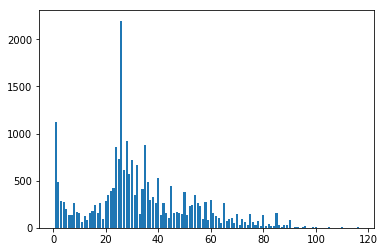

In [89]:
# dict_age_numberperson
plt.bar(list(dict_age_person_sorted.keys()), list(dict_age_person_sorted.values()), align='center')
# plt.xticks(range(len(dict_age_numberperson), list(dict_age_numberperson.keys())))
# fig = plt.figure()
plt.savefig('statistic_age')
plt.show()

In [59]:
dict_age_numberperson['23']

426

In [97]:
for folder in os.listdir(path_classification):
    path_folder = path_classification + str(folder) + "/"
    path_folder_augmentation = path_augmentation + str(folder) + "/"
    for filename in os.listdir(path_folder):
        name_split = filename.split("_")
        save_name_prefix = name_split[0] + "_" + name_split[1]
        img = load_img(path_folder + filename)
        x = img_to_array(img)
        x = x.reshape((1, ) + x.shape)
        i = 0
        if dict_age_person_sorted[int(folder)] >= 500:
            
            for batch in datagen.flow(x, batch_size=1,
                                     save_to_dir=path_folder_augmentation,
                                     save_prefix=save_name_prefix,
                                     save_format='jpg'):
                i += 1
                if i > 5:
                    break
        if dict_age_person_sorted[int(folder)] < 500:
            
            for batch in datagen.flow(x, batch_size=1,
                                     save_to_dir=path_folder_augmentation,
                                     save_prefix=save_name_prefix,
                                     save_format='jpg'):
                i += 1
                if i > 20:
                    break

In [98]:
sum_img_augmentation = 0
for age in range(1, 117, 1):
    if dict_age_person_sorted[age] >= 500:
        sum_img_augmentation += dict_age_person_sorted[age] * 5
    if dict_age_person_sorted[age] < 500:
        sum_img_augmentation += dict_age_person_sorted[age] * 20
print(sum_img_augmentation)

327010


In [99]:
for age in range(1, 117, 1):
    print(age)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116


## Split data from wiki-crop

In [123]:
for filename in os.listdir("../data/UTKFace_processed_augmentation/test/"):
    name = filename.split("_")
    born_year = name[1].split("-")[0]
    dead_year = name[2].split(".")[0]
#     print(born_year, dead_year)
    time = int(dead_year) - int(born_year)
    path_src = "../data/UTKFace_processed_augmentation/test/" + filename
    path_dest = "../data/UTKFace_processed_augmentation/val/" + str(time)
    shutil.copy(path_src, path_dest)